In [95]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Activation Functions
def sigmoid(x,diff=False):
    if diff:
        return x * (1 - x)
    return 1/(1 + np.exp(-x))

def relu(x,diff=False):
    if diff:
        return np.maximum(0.01,np.array(x>0,np.float))
    return np.maximum(0.01*x,x)

In [212]:
# MultiLayer Perceptron
class MLP:
    def __init__(self,i,h1,h2,o):
        self.W1 = 0.001*np.random.random((i,h1))
        self.b1 = 0.001*np.random.random(h1)
        self.W2 = 0.001*np.random.random((h1,h2))
        self.b2 = 0.001*np.random.random(h2)
        self.W3 = 0.001*np.random.random((h2,o))
        self.b3 = 0.001*np.random.random(o)
    def forward(self,x):
        self.x = x
        self.o1 = relu(x.dot(self.W1)+self.b1)
        self.o2 = relu(self.o1.dot(self.W2) + self.b2)
        self.o3 = relu(self.o2.dot(self.W3) + self.b3)
        return self.o3
    def backward(self,err):
        self.delta3 = err*relu(self.o3,diff=True)
        err = self.delta3.dot(self.W3.T)
        self.delta2 = err*relu(self.o2,diff=True)
        err = self.delta2.dot(self.W2.T)
        self.delta1 = err*relu(self.o1,diff=True)
    def update(self,lr=1):
        self.W3 = self.W3 - lr*(self.o2.T.dot(self.delta3))
        self.b3 = self.b3 - lr*np.sum(self.delta3,axis=0)
        self.W2 = self.W2 - lr*(self.o1.T.dot(self.delta2))
        self.b2 = self.b2 - lr*np.sum(self.delta2,axis=0)
        self.W1 = self.W1 - lr*(self.x.T.dot(self.delta1))
        self.b1 = self.b1 - lr*np.sum(self.delta1,axis=0)

In [213]:
# Loss Class
class MSELoss:
    def loss(self,o,t):
        self.grad = o - t
        return np.sum(self.grad*self.grad) / 2
    def calculate_grad(self):
        return self.grad

In [201]:
def train_model(model,dl,epochs,loss):
    for epoch in range(epochs):
        acc = 0
        for x,y in dl:
            o = model.forward(x)
            acc += loss.loss(o,y)
            err = loss.calculate_grad()
            model.backward(err)
            model.update(lr=0.01)
        print(acc)

In [172]:
class DataLoader:
    def __init__(self,x,y,batch_size):
        self.x = x
        self.y = y
        self.length = len(self.x)
        self.curr = 0
        self.batch_size = batch_size
    def __iter__(self):
        return self
    def __next__(self):
        if self.curr >= self.length:
            self.curr = 0
            raise StopIteration
        else:
            _x = self.x[self.curr:self.curr+self.batch_size]
            _y = self.y[self.curr:self.curr+self.batch_size]
            self.curr += self.batch_size
            return (_x,_y)

In [14]:
import pickle
import struct

In [74]:
f = open("train-images-idx3-ubyte","rb")

In [75]:
x = f.read(16)

In [77]:
y = struct.unpack(">4BIII",x)

In [80]:
tot = 60000*28*28

In [89]:
raw_data = np.array(list(struct.unpack(">%dB"%tot,f.read(tot))))

In [97]:
x_train = raw_data.reshape((60000,28*28))

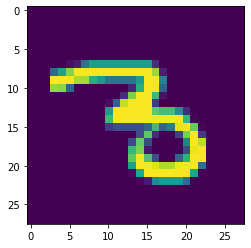

In [103]:
plt.imshow(x_train[30].reshape((28,28)))

In [110]:
f = open("t10k-images-idx3-ubyte","rb")

In [111]:
y = struct.unpack(">4BIII",f.read(16))

In [112]:
tot = 10000*28*28

In [113]:
raw_data = np.array(list(struct.unpack(">%dB"%tot,f.read(tot))))

In [115]:
x_test = raw_data.reshape((10000,28*28))

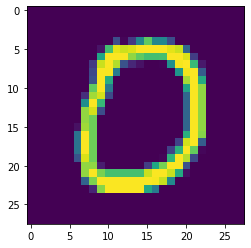

In [118]:
plt.imshow(x_test[10].reshape((28,28)))

In [138]:
f = open("train-labels-idx1-ubyte","rb")

In [139]:
y = struct.unpack(">4BI",f.read(8))

In [140]:
y_train = np.array(list(struct.unpack(">%dB"%60000,f.read(60000))))

In [141]:
f  = open("t10k-labels-idx1-ubyte","rb")

In [142]:
y = struct.unpack(">4BI" , f.read(8))

In [143]:
y_test = np.array(list(struct.unpack(">%dB"%10000,f.read(10000))))

In [214]:
model = MLP(784,550,150,10)

In [215]:
y_train_2 = np.zeros((60000,10))

In [216]:
y_train_2[np.arange(60000),y_train] = 1

In [217]:
dl = DataLoader(x_train/255.0,y_train_2,100)

In [218]:
train_model(model,dl,10,MSELoss())

27100.109257912485
15903.134526566448
2908.707148125274
1662.6043170611392
1224.1825696260948
922.8623647137819
727.900850006504
590.2827191018195
483.58641137663557
403.15693421270936


In [234]:
np.argmax(model.forward(x_test[:20]/255.0),axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4])

In [236]:
y_test[:20]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4])

In [238]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [266]:
pred = np.argmax(model.forward(x_test/255.0),axis=1)

In [281]:
confusion_matrix(pred,y_test)

array([[ 974,    0,    0,    0,    1,    2,    3,    1,    5,    4],
       [   0, 1128,    2,    0,    0,    0,    3,    3,    0,    2],
       [   0,    2, 1013,    4,    1,    0,    0,   11,    2,    0],
       [   0,    1,    5,  992,    0,    5,    1,    1,    1,    5],
       [   1,    0,    1,    0,  967,    1,    6,    3,    2,   12],
       [   0,    0,    1,    4,    0,  876,    6,    0,    7,    1],
       [   1,    1,    2,    0,    6,    5,  939,    0,    1,    1],
       [   1,    0,    6,    4,    1,    1,    0, 1004,    2,    4],
       [   3,    3,    2,    3,    1,    1,    0,    0,  950,    0],
       [   0,    0,    0,    3,    5,    1,    0,    5,    4,  980]])

In [282]:
accuracy_score(pred,y_test)

0.9823

el numer es:  [3]


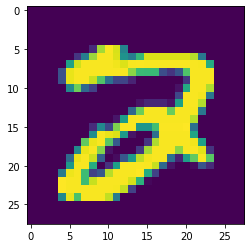

In [283]:
idx = 9980
img = x_test[idx]
plt.imshow(img.reshape((28,28)))
pred_idx = np.argmax(model.forward(img.reshape((1,28*28))),axis=1)
print("el numer es: ",pred_idx)

In [263]:
def gauss(u,s,sinv,x):
    return 

In [280]:
np.where(~(pred == y_test))[0].shape

(177,)

In [289]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

In [298]:
model1 = MLPClassifier(hidden_layer_sizes=(500,100),max_iter=10)

In [299]:
model1.fit(x_train/255,y_train)

/home/elvin/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(500, 100), max_iter=10)

In [303]:
pred2 = model1.predict(x_test/255.0)

In [305]:
accuracy_score(pred2,y_test)

0.9786

In [316]:
x_train_2 = x_train/255.0
x_test_2 = x_test/255.0

In [465]:
from sklearn.decomposition import PCA

In [703]:
dim = 22

In [704]:
pca = PCA(dim)

In [705]:
model3 = pca.fit(x_train_2)

In [706]:
x_train_3 = model3.transform(x_train_2)

In [707]:
x_test_3 = model3.transform(x_test_2)

In [708]:
u = []
for i in range(10):
    test = x_train_3[y_train == i]
    u.append(test.sum(axis=0)/test.size)
u = np.array(u)

In [709]:
s = []
for i in range(10):
    test = x_train_3[y_train == i] - u[i]
    s.append(np.sum(np.matmul(test.reshape((-1,dim,1)),test.reshape((-1,1,dim))),axis=0) /test.size)
s = np.array(s)

In [710]:
sinv = []
sdet = []
for _s in s:
    sinv.append(np.linalg.inv(_s))
    sdet.append(np.linalg.det(_s) ** (1/2))
sinv = np.array(sinv)
sdet = np.array(sdet)

In [711]:
def gauss(x,_u,_sinv,_sdet):
    _tmp = (x - _u)
    A = (1/(_sdet))
    return A * np.exp(-_tmp.dot(_sinv.dot(_tmp)) / 2)

In [712]:
def gauss_predict(x):
    _tmp = []
    for i in range(10):
        _tmp.append(gauss(x,u[i],sinv[i],sdet[i]))
    _tmp = np.array(_tmp)
    return np.argmax(_tmp)

4


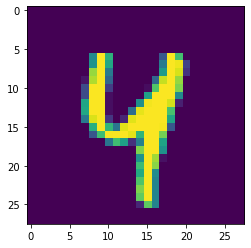

In [713]:
idx = 42
plt.imshow(x_test[idx].reshape(28,28))
print(gauss_predict(x_test_3[idx]))

In [714]:
results = []
for elem in x_test_3:
    results.append(gauss_predict(elem))
results = np.array(results)

In [715]:
confusion_matrix(results,y_test)

array([[ 957,    0,    5,    0,    3,    5,   23,    1,    4,    5],
       [   0,  984,    0,    0,    0,    0,    0,    0,    0,    0],
       [   7,   23, 1006,   14,   23,    5,    5,   58,   25,   24],
       [   2,    5,    2,  959,    3,   38,    0,    7,   25,   10],
       [   0,    0,    1,    1,  922,    0,    1,    5,    1,   21],
       [   6,    1,    1,   14,    2,  819,   28,    6,    7,   11],
       [   2,    0,    3,    0,    1,    4,  882,    0,    2,    0],
       [   1,    0,    2,    4,    1,    0,    0,  884,    2,    2],
       [   5,  122,   11,   14,    8,   20,   19,   36,  905,   28],
       [   0,    0,    1,    4,   19,    1,    0,   31,    3,  908]])

In [716]:
accuracy_score(results,y_test)

0.9226